In [1]:
# For mathematical computations (mean, std, sum etc)
import numpy as np
# To read and write excel spreadsheets and perform analysis 
import pandas as pd

In [2]:
# Plotting library
import matplotlib.pyplot as plt
%matplotlib inline
# Complex plotting library
import seaborn as sns

In [3]:
# Reading the Excel spreadsheet sent by Matt as an object df
df = pd.read_excel("cf.xlsx",sheet_name="1516Students")

In [4]:
# Visualizing the first 5 rows of df (Excel spreadsheet)
df.head()

,HOMEZIP,distance
0,00902,1573
1,00921,1573
2,00966,1573
3,01008,316
4,01235,332


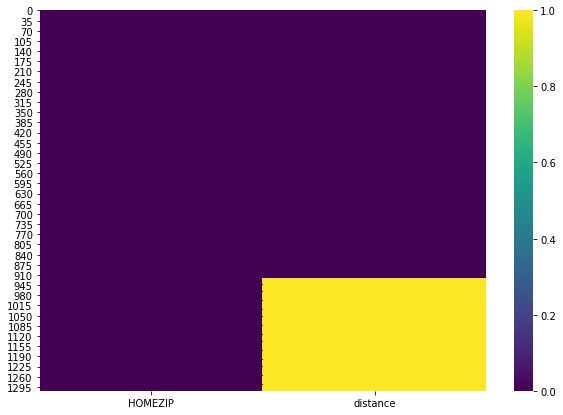

In [5]:
plt.figure(figsize=(10,7))
sns.heatmap(df.isnull(), cmap = 'viridis') 

In [6]:
# Convert all the zips from int object to string
df.HOMEZIP = df.HOMEZIP.astype(str)

In [7]:
# Create a new column zips with just the first 5 characters of the zip code
df['zips'] = df['HOMEZIP'].str.split('-').str.get(0)

In [8]:
# Last 3 rows of df
df.tail(3)

,HOMEZIP,distance,zips
1306,98012-8166,NaN,98012
1307,98012-8166,NaN,98012
1308,98110-2257,NaN,98110


In [9]:
df.head(3)

,HOMEZIP,distance,zips
0,00902,1573,00902
1,00921,1573,00921
2,00966,1573,00966


In [10]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1309 entries, 0 to 1308
Data columns (total 3 columns):
HOMEZIP     1309 non-null object
distance    924 non-null object
zips        1309 non-null object
dtypes: object(3)
memory usage: 30.8+ KB


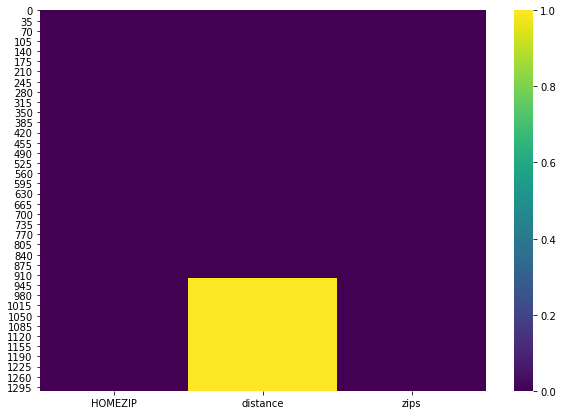

In [11]:
plt.figure(figsize=(10,7))
sns.heatmap(df.isnull(), cmap = 'viridis')

In [12]:
df.drop(['HOMEZIP'], axis = 1, inplace = True)
df.head(3)

,distance,zips
0,1573,00902
1,1573,00921
2,1573,00966


In [13]:
import random
def impute_distance(df):
    x = [1,3.5,5.5,9.5]
    distance = df[0]
    zips      = df[1]
    
    if pd.isnull(distance):
        
        if zips == '21620':
            return random.choice(x)
    else:
        return distance

In [14]:
df['distance'] = df[['distance','zips']].apply(impute_distance, axis =1) 

In [15]:
df.sort_values(by=['zips'], inplace = True)
df.head(3)

,distance,zips
0,1573,00902
1,1573,00921
2,1573,00966


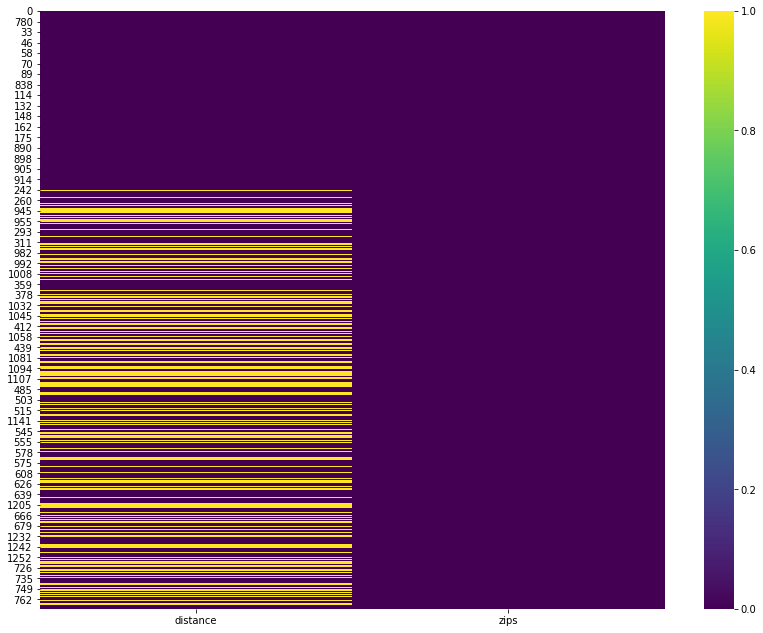

In [16]:
plt.figure(figsize=(14,11))
sns.heatmap(df.isnull(), cmap = 'viridis')

In [17]:
df.info() 

<class 'pandas.core.frame.DataFrame'>
Int64Index: 1309 entries, 0 to 773
Data columns (total 2 columns):
distance    924 non-null object
zips        1309 non-null object
dtypes: object(2)
memory usage: 30.7+ KB


In [18]:
df.isnull().values.any()  

True

In [19]:
df.to_excel('studentTandF16.xlsx', sheet_name = 'NewSheet')